In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from IPython.display import Image

In [28]:
mask_classify_v1 = load_model('models/mask_classify_v1.h5')

In [29]:
mask_classify_v1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [30]:
def prepare_image(file):
    img_path = './Images/dataset/examples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)

    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims


In [31]:
def fetch_image_and_predict(file):
    img_array_expanded_dims = prepare_image(file)
    predictions = mask_classify_v1.predict(tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims))
    result = 'wearing mask' if predictions[0][0] > predictions[0][1] else 'not wearing mask'
    return result

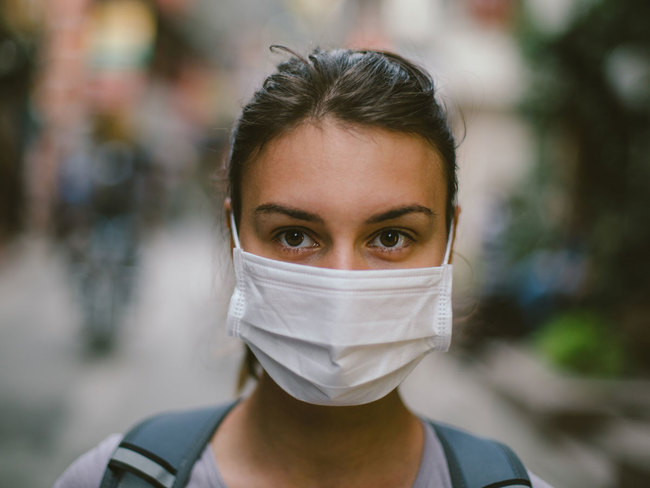

In [32]:
file = 'lady_with_mask.jpeg'
Image(filename=f'./Images/dataset/examples/{file}', width=300, height=200)

In [33]:
print(fetch_image_and_predict(file))

wearing mask


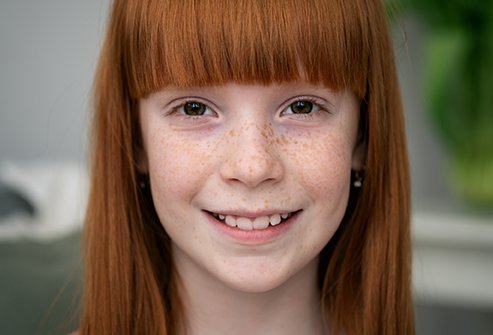

In [34]:
file = 'lady_without_mask.jpeg'
Image(filename=f'./Images/dataset/examples/{file}', width=200, height=100)

In [35]:
fetch_image_and_predict(file)

'not wearing mask'